In [1]:
#brownian particle in a ideal Newtonian fluid (2d):

#calling various library
import numpy as np
from math import *
from random import *
import matplotlib.pyplot as plt

In [2]:
#system parameters.
T=300.0                                   #temparature in unit kelvin
eta_x = 1e4                       #viscosity co efficient in unit Pa.s
eta_y = 2*eta_x

eta_s=1e-3
a=2e-6                          #diameter of the probe sphere in meter

dt_min=1e-8                                      #time step in unit second
dt_max=1e4
tf=1.5e7                             #total time in unit second

kb=1.38e-23                      #boltzman constant s.i unit
Gp_x = 1000                                    #elastic modulus for both model Pa
Gp_y = 2*Gp_x
#some constants determined from the above parameters

D_x=(kb*T)/(6*pi*eta_x*(a/2))                  #diffusion coefficient of liquid
D_y=(kb*T)/(6*pi*eta_y*(a/2)) 

m=0.0                                     #mean of the random walk motion
lamb_x=(eta_s/Gp_x)
lamb_y=(eta_s/Gp_y)

k_x=6*pi*(a/2)*Gp_x   
k_y=6*pi*(a/2)*Gp_y


    

In [3]:
#body of the code
xm=0.0                                     #initial x cordinate in unit micro meter
ym=0.0                                     #initial y cordinate in unit micro meter
xarr_m=[]                                #list of total x after ith step
yarr_m=[]                                #list of total y after ith step

xv=0.0                                     #initial x cordinate in unit micro meter
yv=0.0                                     #initial y cordinate in unit micro meter
xarr_v=[]                                #list of total x after ith step
yarr_v=[]                                #list of total y after 

t=0.0
t_arr=[]                               #delta time array in seconds
dt_arr=[]

In [4]:
t = 0
while t < tf:
    #--------------------maxwell part of the code
    p=uniform(-8,4)
    dt=(10**p)                            #linear distributed in 10 base logscale of time
    s_x=((2*D_x*dt)**(0.5))                   #standard deviation of the random walk in  meter
    s_y=((2*D_y*dt)**(0.5))
    
    
    xm=xm+(gauss(m,s_x))
    xarr_m.append(xm)
    
    ym=ym+(gauss(m,s_y))
    yarr_m.append(ym)
    
    
    #---------------------voight part of the code
    Ax=xv*exp(-(dt/lamb_x))
    Bx=sqrt(((kb*T)/k_x)*(1-exp(-(2*dt/lamb_x))))
    
    Ay=yv*exp(-(dt/lamb_y))
    By=sqrt(((kb*T)/k_y)*(1-exp(-(2*dt/lamb_y))))
    
    xv=(gauss(Ax,Bx))
    xarr_v.append(xv)
    
    yv=(gauss(Ay,By))
    yarr_v.append(yv)
    
    t=t+dt
    t_arr.append(t)
    dt_arr.append(dt)
    
xarr_m=np.array(xarr_m)
yarr_m=np.array(yarr_m)
xarr_v=np.array(xarr_v)
yarr_v=np.array(yarr_v)

xarr_mv=xarr_m +xarr_v
yarr_mv=yarr_m +yarr_v


xarr_mv = np.array(xarr_mv)
yarr_mv = np.array(yarr_mv)

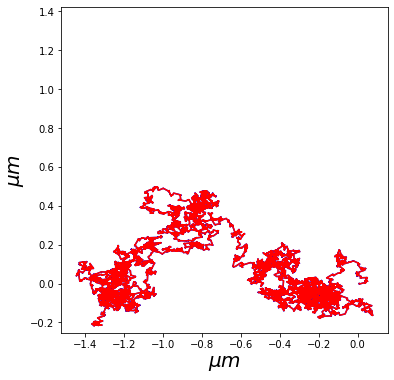

In [5]:
from pylab import rcParams
rcParams ['figure.figsize']=6,6


plt.plot(xarr_mv*1e6,yarr_mv*1e6,'blue')
plt.plot(xarr_m*1e6,yarr_m*1e6,'red')

plt.ylabel(r'$\mu m$', size=20)
plt.xlabel(r'$\mu m$', size=20)
plt.axis('square')
plt.show()


In [6]:
np.savetxt('Desktop/01.txt',xarr_mv)
np.savetxt('Desktop/02.txt', yarr_mv)
np.savetxt('Desktop/03.txt',t_arr)